In [1]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 8.8 MB/s eta 0:00:00


In [2]:

import pandas as pd
import transformers
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
from transformers import pipeline
import shap
import numpy as np


In [3]:
from transformers import TextClassificationPipeline, AutoModelForSequenceClassification, AutoTokenizer
model_name = "ElKulako/cryptobert"
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels = 3)
pipe = TextClassificationPipeline(model=model, tokenizer=tokenizer, max_length=64, truncation=True, padding = 'max_length',return_all_scores=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.35k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/957 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/932 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [4]:
explainer = shap.Explainer(pipe)

 **Single input plot**

In [27]:
input_text = ["Bitcoin will fall down. it will be very fast ."]
input_text2 = ["The writing is on the wall, and you are ignoring it. #bitcoin #BTC"]
merge_text = input_text+input_text2
shap_values = explainer(merge_text)
shap.plots.text(shap_values)

  0%|          | 0/156 [00:00<?, ?it/s]

PartitionExplainer explainer:  50%|█████     | 1/2 [00:00<?, ?it/s]

  0%|          | 0/342 [00:00<?, ?it/s]

PartitionExplainer explainer: 3it [03:09, 94.93s/it]


**Single input values**

In [61]:
shap_values[0]

.values =
array([[ 0.        ,  0.        ,  0.        ],
       [ 0.31260803, -0.11671355, -0.19589447],
       [ 0.13368589, -0.11865668, -0.01502922],
       [ 0.3366643 , -0.09665069, -0.24001361],
       [-0.01771789,  0.11097513, -0.09325726],
       [ 0.07655822, -0.05379592, -0.02276235],
       [-0.00947733,  0.01429302, -0.00481568],
       [-0.23170618,  0.1007852 ,  0.13092097],
       [-0.04641353, -0.00927302,  0.05568656],
       [-0.04336794, -0.01109763,  0.05446555],
       [ 0.23335779, -0.14543825, -0.08791955],
       [ 0.0360611 , -0.00749112, -0.02856999],
       [ 0.        ,  0.        ,  0.        ]])

.base_values =
array([0.18678302, 0.36166182, 0.45155522])

.data =
array(['', 'Bitcoin ', 'will ', 'fall ', 'down', '. ', 'it ', 'will ',
       'be ', 'very ', 'fast ', '.', ''], dtype=object)

In [47]:
shap_values.values

array([array([[ 0.        ,  0.        ,  0.        ],
              [ 0.31260803, -0.11671355, -0.19589447],
              [ 0.13368589, -0.11865668, -0.01502922],
              [ 0.3366643 , -0.09665069, -0.24001361],
              [-0.01771789,  0.11097513, -0.09325726],
              [ 0.07655822, -0.05379592, -0.02276235],
              [-0.00947733,  0.01429302, -0.00481568],
              [-0.23170618,  0.1007852 ,  0.13092097],
              [-0.04641353, -0.00927302,  0.05568656],
              [-0.04336794, -0.01109763,  0.05446555],
              [ 0.23335779, -0.14543825, -0.08791955],
              [ 0.0360611 , -0.00749112, -0.02856999],
              [ 0.        ,  0.        ,  0.        ]]),
       array([[ 0.        ,  0.        ,  0.        ],
              [-0.09435384, -0.02331435,  0.11766819],
              [ 0.02066145, -0.01646449, -0.00419697],
              [-0.09759438,  0.00056838,  0.09702602],
              [ 0.00054379, -0.01689691,  0.01635311],
        

In [48]:
shap_values.data

(array(['', 'Bitcoin ', 'will ', 'fall ', 'down', '. ', 'it ', 'will ',
        'be ', 'very ', 'fast ', '.', ''], dtype=object),
 array(['', 'The ', 'writing ', 'is ', 'on ', 'the ', 'wall', ', ', 'and ',
        'you ', 'are ', 'ignoring ', 'it', '. ', '#', 'bitcoin ', '#',
        'BTC', ''], dtype=object))

get most important word for each class

In [30]:
columns = {'bearish':0 , 'neutral':1 , 'bullish':2}

In [45]:
def most_influential_word(class_number , shap_values, sample_num):
  max_value_index = np.argmax(np.abs(shap_values.values[sample_num][:,class_number]))
  word = shap_values.data[sample_num][max_value_index]
  return word

In [46]:
most_influential_word(columns['bearish'] , shap_values, 1)

'BTC'

get the most critical word

In [49]:
def get_most_critical_word(shap_values, sample_num):
  row_sums = np.sum(np.abs(shap_values.values[sample_num]), axis=1)
  max_value_index = np.argmax(row_sums)
  return shap_values.data[sample_num][max_value_index]

In [51]:
get_most_critical_word(shap_values=shap_values, sample_num=1)

'BTC'

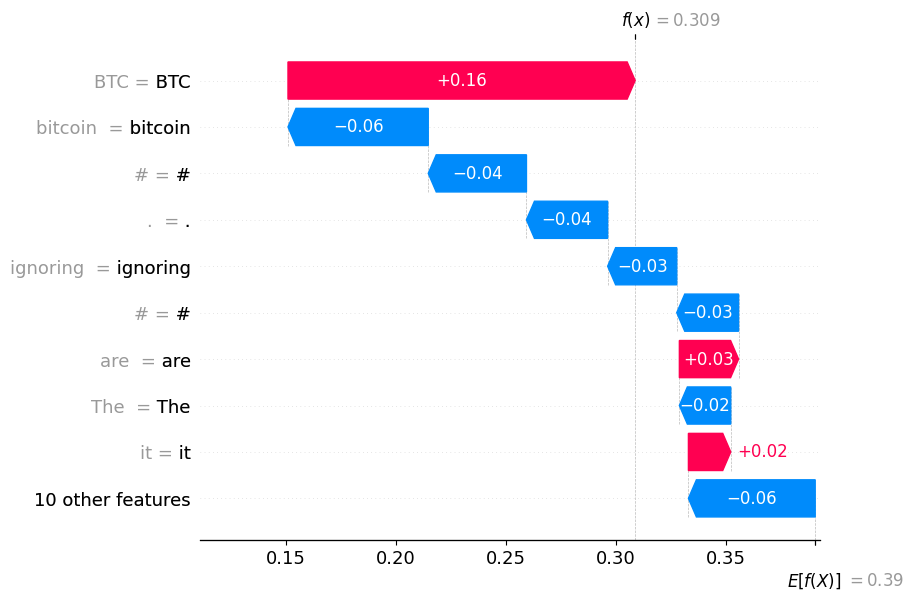

In [68]:
sample_num = 1
shap.plots.waterfall(shap_values[sample_num,:,columns['neutral']])